# Titanic Dataset:
https://www.kaggle.com/c/titanic/data


In [ ]:
import numpy as np
import pandas as pd

Bases de datos necesarias: *train.csv y test.csv*

In [ ]:
df_train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
df_test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
df = df_train.append(df_test, ignore_index=True)

<ipython-input-247-580668a2f65c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test, ignore_index=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Procesado de los datos

Recordemos primero los **problemas** con los que nos podemos encontrar en una base de datos:


1.   Valores Nan
2.   Valores categóricos

En el ejercicio que se presenta a contincuación será necesario enfrentarse a estas situaciones para poder pasar los datos correctos al algoritmo.
¿Cuáles son los distintos métodos que hemos trabajado para poder solventar estas situaciones?



## **Respuesta**:
 Hay varias formas de solventar estas situaciones:
- Eliminar los valores NaN mediante:
df.dropna(axis=0) --> Elimina filas con valores NaN
df.dropna(axis=1) ---> Elimina columnas con valores NaN
- Reemplazar por la media los valores NaN mediante:
df.fillna(df.mean()) o la moda df.fillna(df.mode())
- Valores Categoricos podemos asignar manualmente valores numericos a esas categorias mediante df['variable_categoria'].map(categoria:valor, etc)
-Tambien podemos asignar a cada categoria un valor numerico con fit_transform(df[variable_categoria])
- Y por ultimo podemos converitr las variables categoricas en columnas binarias para cada categoria mediante .get_dummies(df[variable:_categoria])


## ¿Con que tipo de información vamos a trabajar?

A partir de la información subministrada por ***df.info()***; ¿Qué variables deben ser modificadas? ¿Porque razón? ¿ Qué métodos podemos emplear?



# **Respuesta**:
Deberiamos modificar las siguientes
variables:
-Survived: Tiene valores nulos ya que cuenta 891 en vez 1309. Podriamos eliminar las filas con valores nulos si no podemos estimar los valores faltantes. df.dropna() o df['Survived'].fillna(df['Survived'].median())

- Age: Cuenta 1046 en lugar de 1309. Podriamos aplicar la media a los valores nulos.df.mean()
- Fare: Tiene un valor nulo ya que cuenta 1308 en vez 1309. Aplicariamos la media a ese valor nulo. df.mean()
- Gabin: La mayoria son valores nulos cuenta 295 del total de 1309. Podriamos eliminar esta columna si la info no es esencial o convertirla en variable binaria (get_dummies())
- Embarked:Tiene algunos valores nulos ya que cuenta 1307 en vez 1309. Podemos aplicar la moda (que es el valor mas frecuente).'fillna(df['Embarked'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
#Si queremos ver únicamente los primeros valores que hay en una base de datos ejecutamos:

df.head()

#Recordemos la importancia de visualizar la tabla, para poder ver de una manera clara como está estructurada la información

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#¿Cuántas filas tiene nuestra base de datos?
df.shape[0]

1309

## Transformaciones

### Datos categóricos

Podemos hacer transformaciones binarias

**SEXO**

In [ ]:
# Asigno a los valores nulos 'unknown' (desconocido) antes de la transformación binaria
df['Sex'].fillna(value='unknown', inplace=True)

In [ ]:
# Utiliza sustitución
# Aqui realizo por sustitucion la transformación binaria chicos = 0, chicas=1 y desconocido = -1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1, 'unknown': -1})



In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


**TICKET**
Para transformar también debemos comprender los datos con los que trabajamos.

In [ ]:
df['Ticket'] = df['Ticket'].map(lambda k: k[0])
df.head()
# Después de ejecutar este código, la columna 'Ticket' contendrá solo el
#primer carácter de cada valor original en esa columna.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,P,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,8.0500,NaN,S


¿Que hace la siguiente función?¿Para qué nos puede servir?

.cat.codes() accede a los codigos de la categoria que se encuentran asociados a cada valor en la columna categorica, es decir convierte una colunma en categorica y da acceso a esos codigos.
La funcion encode_label() es una funcion que realiza la codificacion de etiquetas para una coluna utilizando datos categoricos y despues obtiene los codigos de las categorias asignados a cada valor.En este caso en la columna Ticket, reemplaza los valores A', 'W', 'F', 'L', '5', '6', '7', '8', '9' con el valor '4'. Y despues aplica la funcion encode_label() en la columna Ticket, la convierte en categorica y convierte el resto de valores de esa columna a codigos numericos.

In [ ]:
def encode_label(df):
    return df.astype('category').cat.codes

In [ ]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')
df['Ticket'] = encode_label(df['Ticket'])
df['Ticket']

0       3
1       5
2       6
3       0
4       2
       ..
1304    3
1305    5
1306    6
1307    2
1308    1
Name: Ticket, Length: 1309, dtype: int8

In [ ]:
#¿Cuántos valores tenemos de cada clase?
valores_clases = df['Ticket'].value_counts().head(7)
print(valores_clases)


2    429
1    278
0    210
3    119
5     98
6     98
4     77
Name: Ticket, dtype: int64


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,S


Mientras que en las situaciones numéricas como se ha visto anteriormente sí que es posible resolver los valores que nos faltan mirando resultados comunes, en sitaciones categoricas es diferente. Es el caso, por ejemplo, de la feature cabina.

In [ ]:
# ¿Hay algún valor nulo?
cabina_nulos = df['Cabin'].isnull().sum()
cabina_nulos

1014

In [ ]:
# En este caso vamos a decantarnos por eliminar la columna cabin
df.dropna()

#'inplace=True' significa que la operación se realizará directamente
#en el DataFrame original.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,0,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,5,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,0,52.5542,D35,S
872,873,0.0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,3,5.0000,B51 B53 B55,S
879,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,0,83.1583,C50,C
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,0,30.0000,B42,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,S


**EMBARKED**

La variable **Embarked** nos indica el puerto en que nuestros pasajeros embarcaron

In [ ]:
# Hay algún valor nulo?
embarked_nulos = df['Embarked'].isnull().sum()
embarked_nulos #no hay valores nulos

2

In [ ]:
# ¿Cuántas muestras de cada clase tenemos?
muestras_clases = df['Embarked'].value_counts()
muestras_clases

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
# Podemos plantear dos situaciones; podríamos llenar los huecos con el valor más común, dado que solo son 2 los valores que nos faltan. O podríamos eliminar estas filas.
# Emplea el método que más te guste.

#Asignamos el valor mas comun (Moda)
moda_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(moda_embarked)

#Eliminamos filas con valores nulos de la columna Embarked
#df.dropna(subset=['Embarked'], inplace=True)

#Aplicaré la primera opción la MODA

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

In [ ]:
df['Embarked'].isna().value_counts() # Ha de salir solo False

False    1307
True        2
Name: Embarked, dtype: int64

In [ ]:
# Finalmente; es importante tener en cuenta de que se trata de un valor categórico, razón por la cual debemos trasformarlo a una clase numérica. 0,1,2.
# Pista: anteriormente hemos definido una función que realiza esta tarea, úsala aquí también.

df['Embarked']= encode_label(df['Embarked'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,2


**NAME: NOMBRE**
¿Qué opciones tenemos con el nombre?

Una variable como el nombre puede darnos mucha más información de la que pueda parecer a simple vista ya que es una variable única para cada pasajero. Por ejemplo los títulos nobiliarios suelen ser añadidos al nombre. Ante esta situación podemos extraer nuevos datos.

Con el nombre tenemos varias opciones:
- Extraer la longitud del nombre
- Extraer apellidos o los nombres más comunes (que más se repiten)
- Extraemos las palabras D. Dña, etc.  

In [ ]:
# ¿Cómo está estructurado el nombre? ¿Dónde se encuentra la información que nos interesa?
df['Title'] = df['Name'].map(lambda z: z.split(",")[1].split(".")[0])
df['Title']

0            Mr
1           Mrs
2          Miss
3           Mrs
4            Mr
         ...   
1304         Mr
1305       Dona
1306         Mr
1307         Mr
1308     Master
Name: Title, Length: 1309, dtype: object

# Respuesta:
 df['Name'].map(lambda z:..;
 Aplica a cada valor de la columna 'nombre' la función lambda que se encarga de coger cada nombre z y mediante z.split(",")[1] divide el nombre usando la coma. Esto genera una lista de varias partes y seleccióna la segunda parte [1]. Despues mediante .split(".")[0]) toma la segunda parte y la divide usando el punto. Todo queda asignado a la columna Title. texto en negrita

In [ ]:
# En el paso anterior nos hemos quedado con variables categóricas; ¿Cómo las transformamos a numéricas?
label_encoder = LabelEncoder()
df['Title_codificado'] = label_encoder.fit_transform(df['Title'])
#Aqui asigno a cada categoria un numero entero unico en la columna Title y colocamos en una nueva columna llamada Title_codificado


In [ ]:
# El método presentado pordría ser una opción; sin embargo da lugar a muchas clases.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_codificado
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,2,Mr,12
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,0,Mrs,13
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,2,Miss,9
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,2,Mrs,13
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,2,Mr,12


In [ ]:
# Otra opción sería clasificarlos por clases
def get_titles(df):
    title_dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Dona": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"
    }
    print(df['Name'])

    def process_name(x):
        # print(x)
        return x.split(',')[1].split('.')[0].strip()

    df['Title'] = df['Name'].map(process_name)
    df['Title'] = df.Title.map(title_dictionary)
    print(df['Name'][df['Title'].isna()])

    return df

In [ ]:
# De esta manera nos quedamos únicamente con cinco grupos.
df = get_titles(df)
df['Title'] = df['Title'].map({'Officer': 0, 'Royalty': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Mr': 5}).astype(int)

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object
Series([], Name: Name, dtype: object)


In [ ]:
# Como hemos comentado anteriormente la variable nombre por si sola no nos interesa, por lo cual deberemos eliminarla
df.drop('Name', axis=1, inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_codificado
0,1,0.0,3,0,22.0,1,0,3,7.2500,NaN,2,5,12
1,2,1.0,1,1,38.0,1,0,5,71.2833,C85,0,2,13
2,3,1.0,3,1,26.0,0,0,6,7.9250,NaN,2,3,9
3,4,1.0,1,1,35.0,1,0,0,53.1000,C123,2,2,13
4,5,0.0,3,0,35.0,0,0,2,8.0500,NaN,2,5,12


### Datos numéricos

**FARE: TARIFA**


*   ¿Variable numérica o categórica?
*   Tenemos missing values? ¿Qué método puedo emplear para substituirlos?




# **Respuesta:**
Fare representa la tarifa, esta formada por los precios de los billetes, por lo que es una variable numerica ya que refleja el coste.
Por otro lado, no tenemos missing values, pero en caso de ternelos podemos asignar la media (.mean()) o mediana (.median())

In [ ]:
# ¿Tenemos valores NaN?
fare_nulos = df['Fare'].isnull().sum()
fare_nulos

1

In [ ]:
# Almacena la fila en la que falta el valor en una variable na_fare y muéstrala

# Almacena la fila donde falta el valor en 'na_fare'
na_fare = df[df['Fare'].isnull()]

# Muestra la fila
na_fare


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_codificado
1043,1044,NaN,3,0,60.5,0,0,2,NaN,NaN,2,5,12


In [ ]:

# En este caso particular se quiere emplear la media para poder llenar el hueco. Por elección individual, creo que Ticket, Pclass y Embarked son variables interesantes que
# definen el tipo de persona que adquiere ese ticket, por lo tanto su coste. Cual es el valor medio del ticket para aquellos pasajeros que cumplen las mismas condiciones
# que nosotros?.
df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & (df['Pclass'] == na_fare['Pclass'].values[0]) &(df['Embarked'] == na_fare['Embarked'].values[0]) ].mean()

12.072079522184302

In [ ]:
# Y si en lugar del valor medio usamos la mediana? ¿Cuál de los dos será mejor y porque?
guess_Fare = df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & (df['Pclass'] == na_fare['Pclass'].values[0]) & (df['Embarked'] == na_fare['Embarked'].values[0])].median()
guess_Fare

8.05

In [ ]:
# Llena los huecos con el valor guess_Fare
df['Fare'].fillna(guess_Fare)

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

In [ ]:
# Comprobamos que no nos queden huecos
valores_nulos = df.isnull().sum()
valores_nulos

PassengerId            0
Survived             418
Pclass                 0
Sex                    0
Age                  263
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin               1014
Embarked               0
Title                  0
Title_codificado       0
dtype: int64

Es cierto que hemos trabajado con valores categoricos en los que es imprescindible poder cambiarlos a clases numéricas, por ejemplo. Sin embargo hay situaciones en las que un rango de valores numéricos también es interesante poderlos transformar en clases de tal manera que tengamos agrupaciones.

<Axes: >

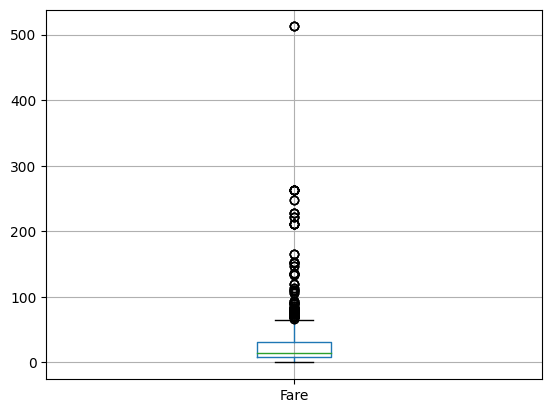

In [ ]:
# Puede observarse mediante un gráfico la distribución de los datos. ¿Qué información podemos extraer?¿Nos permite esta representación una división de los datos?
df.boxplot('Fare')

# Respuestas:
¿Que información podemos extraer?
Con este boxplot podemos extraer la mediana (linea en el centro del cuadro), la dispersión de los datos. También observamos valores atipicos en las lineas que se extienden el la figura, estos puntos se consideran valores atipicos (outliers) y pueden indicar errores en datos, etc.
¿Nos permite esta representación una división de los datos?. Sí, el boxplot es una herramineta muy útil para dividir los datos y comparar distribuciones entre diferentes categorias en este caso en función de los grupos o categorias de la columna Fare

<Axes: ylabel='Frequency'>

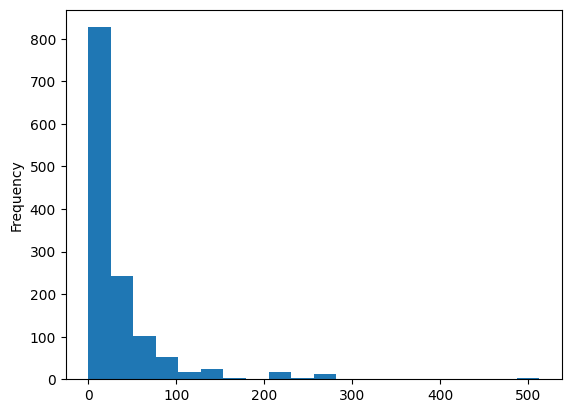

In [ ]:
df['Fare'].plot.hist(bins=20)

Creamos bins para las tarifas y asignamos un número

In [ ]:
#Para evitar el error quitamos los valores nulos por la mediana para poder
#convertir directamente a enteros antes de aplicar 'qtus' y asisgnar numeros a los
# bins.

df['Fare'].fillna(df['Fare'].median())

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

In [ ]:
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

In [ ]:
# Muestra cuántos valores hay en cada bin de Fare-bin
valores_bin = df['Fare-bin'].value_counts()
valores_bin

1    275
4    265
5    259
3    256
2    254
Name: Fare-bin, dtype: int64

**PassengerID**

In [ ]:
from numpy.lib.index_tricks import AxisConcatenator
#¿Nos indica algo? ¿Podemos eliminarla?
#Esta columna es un identificador de los pasajeros, no nos proporciona una informacion
#demasiado importante en sí, ya que es una etiqueta. Por este motivo se puede eliminar
#si no se va a usar concretamente para el analisis o visualización.

df.drop('PassengerId', axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_codificado,Fare-bin
0,0.0,3,0,22.0,1,0,3,7.2500,NaN,2,5,12,1
1,1.0,1,1,38.0,1,0,5,71.2833,C85,0,2,13,5
2,1.0,3,1,26.0,0,0,6,7.9250,NaN,2,3,9,2
3,1.0,1,1,35.0,1,0,0,53.1000,C123,2,2,13,5
4,0.0,3,0,35.0,0,0,2,8.0500,NaN,2,5,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,NaN,0,0,3,8.0500,NaN,2,5,12,2
1305,NaN,1,1,39.0,0,0,5,108.9000,C105,0,1,3,5
1306,NaN,3,0,38.5,0,0,6,7.2500,NaN,2,5,12,1
1307,NaN,3,0,NaN,0,0,2,8.0500,NaN,2,5,12,2


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_codificado,Fare-bin
0,1,0.0,3,0,22.0,1,0,3,7.2500,NaN,2,5,12,1
1,2,1.0,1,1,38.0,1,0,5,71.2833,C85,0,2,13,5
2,3,1.0,3,1,26.0,0,0,6,7.9250,NaN,2,3,9,2
3,4,1.0,1,1,35.0,1,0,0,53.1000,C123,2,2,13,5
4,5,0.0,3,0,35.0,0,0,2,8.0500,NaN,2,5,12,2


**EDAD**

In [ ]:
# ¿Tenemos valores nulos? Sí 263 nulos
df['Age'].isnull().sum()

263

##SÓLO A TÍTULO INFORMATIVO

Otra manera de llenar los huecos no es sólo haciendo la media sino empleando un algortimo por sí mismo para poder predecir estos valores nulos.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ¿Qué variables nos interesan para tener en cuenta?
df_sub = df[['Age','Title','Fare','SibSp']]

In [ ]:
# Para poder entrenar el modelo y comprobar que funciona adecuadamente para aplicarlo a los datos desconocidos debemos:
# 1. eliminar aquellas filas nulas de los datos de entrenamiento
# 2. guardar en test las filas nulas.
X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()

X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

In [ ]:
# Aplicamos el algortimo
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
# Predecimos los valores que nos faltan
y_pred = np.round(regressor.predict(X_test),1)
y_pred

array([26.6, 32.1, 38.6, 27.5, 21.6, 27.7, 29.4, 27.5, 26. , 27.7, 30.1,
       37. , 27.5, 24.8, 39.6, 31.1,  6.6, 27.7, 30.1, 22.1, 30.1, 30.1,
       27.7, 28. ,  7.8, 30.1, 37.6,  6.4, 31.8, 31. , 24.7, 13.1, 41.6,
       39. ,  5.9, 20.6, 32.2, 56.7, 30.2, 37.6, 27.5, 16.4, 27.7, 27.7,
        7.7, 22.4, 16.6,  8.7, 31. , 59.2, 37.6, 27.5, 43.8, 27.5, 36.5,
       39. , 31.1, 41.8, 27.5, 23.6, 22.6, 30.1, 29.5, 16.4, 14.2, 37.3,
       27.7, 23.9, 57.1, 27.5, 21.6, 21.6, 37. , 28.8, 27.5, 34. , 27.7,
       26.6,  7.7, 27.7, 25.2, 36.5, 27.1, 27.7, 31. , 37.6, 23.9, 22.7,
       19.3, 30.1, 33.9, 37.6, 30.1, 36.5, 26.6, 31. , 46.9, 36.5,  7.7,
       19.3, 50.5, 36.9, 26.1, 46.6, 30.1, 36.8, 27.5, 26. , 32.3, 26. ,
       30.3, 32.7, 24.2, 31.5, 32.5, 37.6, 30.1, 20.3, 26. , 27.5, 25.8,
       24.7, 30.1, 27.5, 15.6, 27.5, 27.7, 44.2, 27.1,  8.7, 37.6, 26.6,
       36.5, 27.3, 29.5, 32.6, 27.7, 22.6, 27.7, 28. , 33.5, 36.5, 20.3,
       29.5, 17.9,  6.6, 46.6, 37.3, 18.4, 36.5, 27

In [ ]:
# Sustituimos estos valores en el dataset
df.Age.loc[df.Age.isnull()] = y_pred

<ipython-input-307-8419d658c54e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age.loc[df.Age.isnull()] = y_pred


In [ ]:
# Comprobamos si nos quedan valores nulos o no
df.Age.isnull().sum(axis=0)

0

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_codificado,Fare-bin
0,1,0.0,3,0,22.0,1,0,3,7.2500,NaN,2,5,12,1
1,2,1.0,1,1,38.0,1,0,5,71.2833,C85,0,2,13,5
2,3,1.0,3,1,26.0,0,0,6,7.9250,NaN,2,3,9,2
3,4,1.0,1,1,35.0,1,0,0,53.1000,C123,2,2,13,5
4,5,0.0,3,0,35.0,0,0,2,8.0500,NaN,2,5,12,2


## Agrupaciones

Como se ha comentado anteriormente, tener muchas clases distintas no nos favorece necesariamente. Ante esta situación podemos hacer grupos para poder reducir el número de clases, por ejemplo por rango de edades.

In [ ]:
df['Age-bin'] = df['Age']
df.loc[df['Age-bin'] <= 16, 'Age-bin'] = 0
df.loc[(df['Age-bin'] > 16) & (df['Age-bin'] <= 32), 'Age-bin'] = 1
df.loc[(df['Age-bin'] > 32), 'Age-bin'] = 2

Un aspecto a añadir pueden ser los **dummies** en los cuales en lugar de tener una columna donde aparecen múltiples clases tenemos una columna con cada una de las clases indicando si el elemento de esa fila pertence a la clase '1' o no '0'.

In [ ]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 3 else 0)
df['MediumFamily'] = df['FamilySize'].map(lambda s: 1 if s == 4 else 0)
df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)


### Ahora ya tenemos nuestra base de datos lista, por el momento....

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_codificado,Fare-bin,Age-bin,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily
0,1,0.0,3,0,22.0,1,0,3,7.2500,NaN,2,5,12,1,1.0,2,0,1,0,0
1,2,1.0,1,1,38.0,1,0,5,71.2833,C85,0,2,13,5,2.0,2,0,1,0,0
2,3,1.0,3,1,26.0,0,0,6,7.9250,NaN,2,3,9,2,1.0,1,1,0,0,0
3,4,1.0,1,1,35.0,1,0,0,53.1000,C123,2,2,13,5,2.0,2,0,1,0,0
4,5,0.0,3,0,35.0,0,0,2,8.0500,NaN,2,5,12,2,2.0,1,1,0,0,0


**Para pensar:**


1.   ¿Qué efecto tiene escoger de manera aleatoria el % de datos que van al entrenamiento (train) y a la prueba (test). ¿Cómo afecta nuestro resultado a la accuracy? ¿Qué nos está indicando de los datos?
2. ¿Cuáles son las variables que hemos de tratar para poder usar la base de datos?



# *Respuestas:*
1. Elegir de manera aleatoria el % de datos que se destinan al entrenamiento (train) y a las pruebas (test) puede afectar al rendimiento del modelo, si tenemos pocos datos de entrenamiento, el modelo no aprenderá bien los patros y generalizará mal con los nuevos datos. Si tenemos pocos datos de prueba, el rendimiento puede que no se corresponda con lo que realmente puede dar el modelo.
Tambien puede cambiar los resultados al elegir aleatoriamente en el train y en el test cada vez que se ejecute el modelo. En cuanto al resultado de la accuracy puede variar entre el mismo y el copnjunto de pruebas segun como se dividan los datos, a su vez y no ser estable ya que si cambias la división, el promedio accuracy puede cambiar.
En cuanto a los datos todos estos motivos nos pueden indicar que conjunto de datos es pequeño, de ahí que varíe los resultados, también nos indica que el modelo es sensible a variaciones de datos de entrenamientos, lo nos da a entender que el modelo es inestable o requere más datos para generalizar mejor. Si por el contrario el modelo es robusto y generaliza bien nos indica que tiene capacidad para adpatarse a diferentes conjuntos de datos y por lo tanto sería algo positivo.

2. Las variables que debemos tratar para usar correctamente una BBDD son:
Valores nulos (NaN): Como venimos haciendo ya sea por sustitución, eliminación, media, mediana, etc.
Valores Categoricos: Son aquellos que necesitan ser codificados para convertirse a variables numericas.
Normalización/Estandarización: Dependiendo del caso es recomendable realizarlo sobre las variables numericas para asegurarnos que tengan escalas comparables.
Eliminación de columnas innecesarias: Si alguna columna no nos aporta información relevante y no se va a utilizar, es preferible eliminarla para que quede una BBDD mucho más limpia.
Analisis de Ouliers: Valores atipicos que encontramos en las variables.
Division en conjunto de train y test: Dividimos los datos en conjuntos de train y test, de manera que nos permite entrenar le modelo en un conjunto de datos y evaluar su rendimiendo en otro conjunto de datos independiente. Nos puede garantizar que tengamos un conjunto de datos robusto y representativo del modelo.
